In [109]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

## neural network library
from keras.models import Sequential
from keras.layers import Dense, Dropout
from mlxtend.plotting import plot_confusion_matrix

In [110]:
## load the data
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [111]:
## split the data into independent and dependent variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [112]:
## split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state = 25)

In [113]:
## Neural Network
## initialise the NN
model = Sequential()

##set up the layers
## input layer
model.add(Dense(units= 16, kernel_initializer= 'uniform', activation = 'relu', input_dim = 12))
## hidden layer
model.add(Dense(units= 8, kernel_initializer= 'uniform', activation = 'relu'))
model.add(Dense(units= 4, kernel_initializer= 'uniform', activation = 'relu'))
##regularization
##model.add(Dropout(0.2))
##output layer
model.add(Dense(units= 1, kernel_initializer= 'uniform', activation = 'sigmoid'))

## compiling the ANN

model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])

In [114]:
## train the model
history = model.fit(X_train, y_train, batch_size = 25, epochs = 80, validation_data=(X_test,y_test))

Epoch 1/80
11/11 [==============================] - 2s 25ms/step - loss: 0.6643 - accuracy: 0.6811 - val_loss: 0.6390 - val_accuracy: 0.6667
Epoch 2/80
11/11 [==============================] - 0s 5ms/step - loss: 0.6310 - accuracy: 0.6811 - val_loss: 0.6381 - val_accuracy: 0.6667
Epoch 3/80
11/11 [==============================] - 0s 5ms/step - loss: 0.6324 - accuracy: 0.6811 - val_loss: 0.6381 - val_accuracy: 0.6667
Epoch 4/80
11/11 [==============================] - 0s 5ms/step - loss: 0.6369 - accuracy: 0.6811 - val_loss: 0.6381 - val_accuracy: 0.6667
Epoch 5/80
11/11 [==============================] - 0s 5ms/step - loss: 0.6265 - accuracy: 0.6811 - val_loss: 0.6393 - val_accuracy: 0.6667
Epoch 6/80
11/11 [==============================] - 0s 5ms/step - loss: 0.6308 - accuracy: 0.6811 - val_loss: 0.6385 - val_accuracy: 0.6667
Epoch 7/80
11/11 [==============================] - 0s 5ms/step - loss: 0.6348 - accuracy: 0.6811 - val_loss: 0.6380 - val_accuracy: 0.6667
Epoch 8/80
11/11 [=

In [115]:
## make prediction
y_pred_ann = model.predict(X_test)
y_pred_ann = np.where(y_pred_ann > 0.5, 1, 0)

2/2 [==============================] - 0s 2ms/step


In [116]:
print(y_test.shape)
print(y_pred_ann.shape)

(45,)
(45, 1)


In [117]:
y_pred_ann = y_pred_ann.flatten()

In [118]:
print(y_test.shape)
print(y_pred_ann.shape)

(45,)
(45,)


In [119]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ann})

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,1,0
6,1,0
7,1,0
8,1,0
9,0,0


In [120]:
##classification report
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        30
           1       0.00      0.00      0.00        15

    accuracy                           0.67        45
   macro avg       0.33      0.50      0.40        45
weighted avg       0.44      0.67      0.53        45



C:\Users\yener\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yener\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yener\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344

In [121]:
cm = confusion_matrix(y_test, y_pred_ann)
cm

array([[30,  0],
       [15,  0]], dtype=int64)

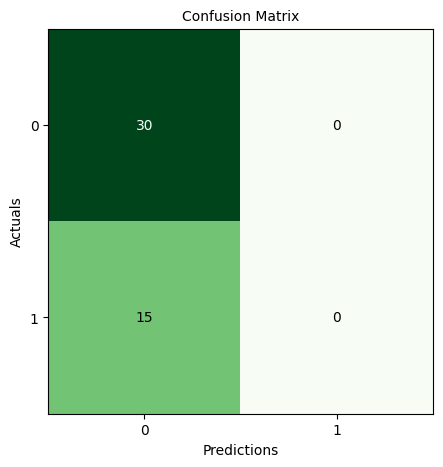

In [122]:
## plot a confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5, 5), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize = 10)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

In [123]:
auc = roc_auc_score(y_test, y_pred_ann)
print('AUC: %f' %auc)

AUC: 0.500000


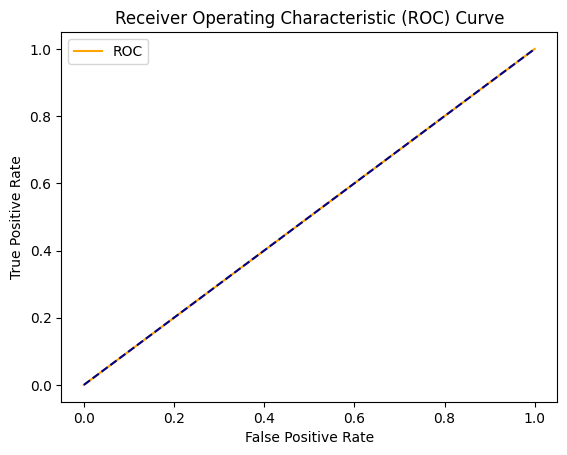

In [124]:
fpr, tpr = roc_curve(y_test, y_pred_ann)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()